## Plot map and points on this map given information of lat and lon



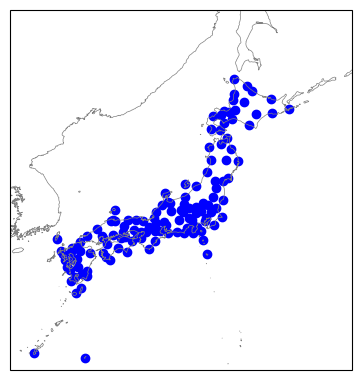

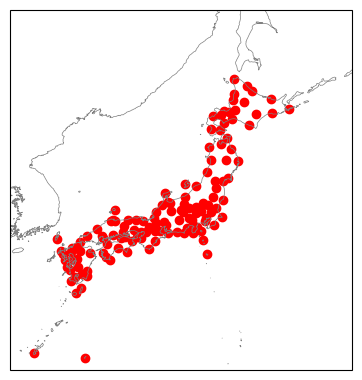

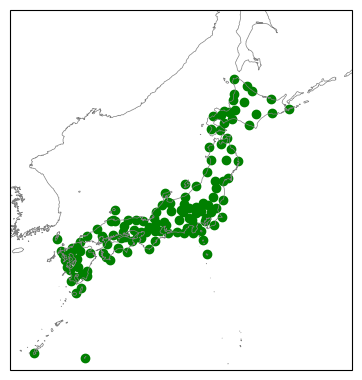

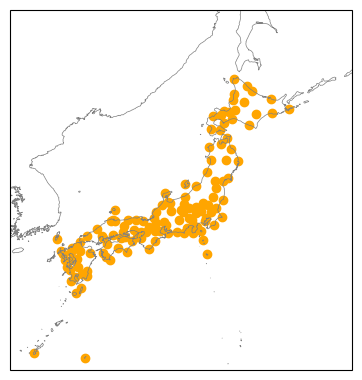

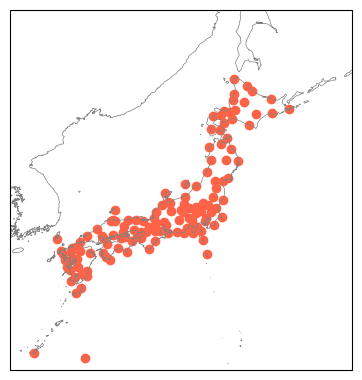

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import pandas as pd


proj =  ccrs.PlateCarree()
df = pd.read_csv('data/AMeDAS_stations.csv', index_col=0)

# add loop into this code
colors = ['b', 'r', 'g', 'orange', 'tomato']
for i in range(5):
    fig = plt.figure(figsize=(4, 4))
    ax = plt.axes([.05,0.05,.9,.9], projection= proj )
    
    ax.set_extent([126,150,25, 50])  # extend of map: lon1, lon2, lat1, lat2
    ax.coastlines(resolution='10m',lw=.5, color='gray')
    
    #ax.stock_img()
    
    ax.scatter(df.longitude, df.latitude, color=colors[i], marker='o')
    #ax.scatter(df.longitude, df.latitude, c=df.latitude, marker='o')

    plt.savefig('figure_'+str(i)+'.png')


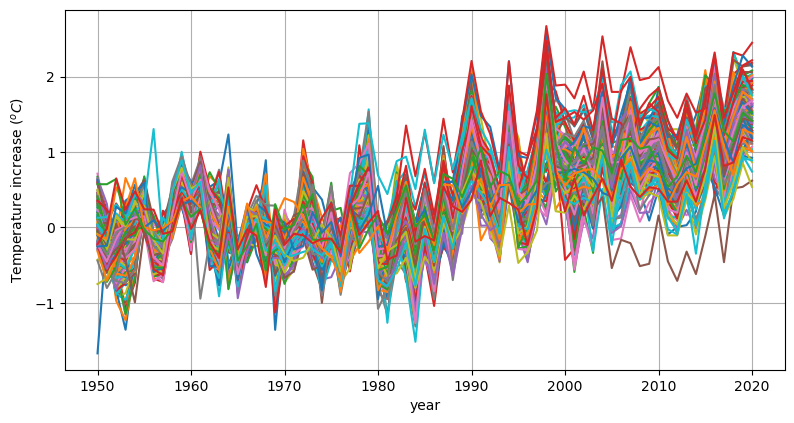

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = pd.read_csv('data/warming_70years_japan.csv', index_col=0)

fig = plt.figure(figsize=(8, 4))
ax = plt.axes([.05,0.05,.9,.9] )


x = df.columns.astype(int)
y = df.values.T
ax.plot(x, y)
ax.set_xlabel('year')
ax.set_ylabel('Temperature increase ($^oC$)')
ax.grid()


## Using k-means to cluster 


In [11]:
import sys, os
import numpy as np
import pandas as pd


df = pd.read_csv('data/warming_70years_japan.csv', index_col=0)
X = df.values

# do k-means
from sklearn.cluster import KMeans
k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)
k_means.fit(X)

KMeans(n_clusters=3, n_init=10)

Text(0.01, 0.9, 'Grouping wamring')

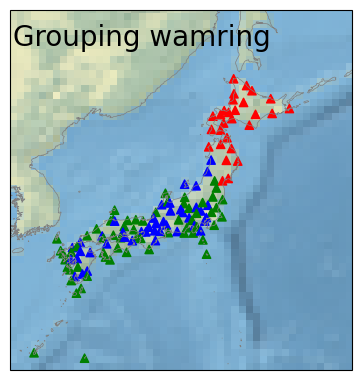

In [15]:
import sys, os
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#========================================================
# plot results
import cartopy.crs as ccrs

proj =  ccrs.PlateCarree()

fig = plt.figure(figsize=(4, 4))
ax = plt.axes([.05,0.05,.9,.9], projection= proj )


ax.set_extent([126,150,25, 50])
ax.coastlines(resolution='10m',lw=.5, color='gray')

ax.stock_img()
df = pd.read_csv('data/AMeDAS_stations.csv', index_col=0)
clus = k_means.labels_


colors = ['b', 'r', 'g', 'orange', 'tomato']
    
cols = np.array(len(df) * ['k'])
for ic, c in enumerate( np.unique(clus) ): 
    cols = np.where( clus == c,  colors[ic], cols)
                
    
ax.scatter(df.longitude, df.latitude, color=cols, marker='^')

ax.text(0.01,.9, 'Grouping wamring', fontsize = 20, transform = ax.transAxes )
